In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
X_train_full = X_train_full/255

In [7]:
X_train, X_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

Text(0.5, 1.0, 'Dress')

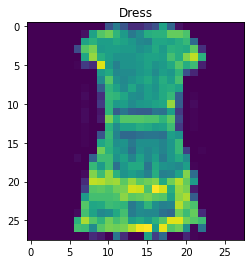

In [10]:
plt.imshow(X_train[8])
plt.title(class_names[y_train[8]])

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden_1 = model.layers[1]
hidden_1.name

'dense'

In [16]:
model.get_layer('dense') is hidden_1

True

In [18]:
weights, bias = hidden_1.get_weights()
weights

array([[ 0.01336274,  0.06038009, -0.06222065, ...,  0.05311263,
         0.03033163,  0.06349838],
       [ 0.04105907, -0.02632918, -0.02126987, ..., -0.05982932,
        -0.00207292,  0.0422587 ],
       [-0.00091089,  0.03774926, -0.01799957, ..., -0.04065502,
        -0.05283017, -0.07041728],
       ...,
       [-0.00884193,  0.02972011,  0.02006804, ...,  0.03071366,
        -0.00400301,  0.03196934],
       [-0.07434861,  0.05023646, -0.0693901 , ...,  0.0691877 ,
         0.03024612, -0.07398502],
       [ 0.00845333, -0.05475127,  0.05613412, ..., -0.03073752,
         0.06112859, -0.00751808]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [21]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
bias.shape

(300,)

In [26]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# for using 'sparse_categorical_crossentropy'
# sparse labels: for each instance there is only 1 target index from 0-9 in this case
# also classes are exclusive

if we had one target probablity per class per instance (such as one-hot encoder), then we 
use categorical_crossentropy

if we were doing binary classification then we would use 'sigmoid' function in output instead of 'softmax'
and 'binary_crossentropy' as the loss function

In [27]:
history = model.fit(X_train, y_train,epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9878 - accuracy: 0.6867 - val_loss: 0.5072 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5015 - accuracy: 0.8249 - val_loss: 0.4497 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4527 - accuracy: 0.8399 - val_loss: 0.4125 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4225 - accuracy: 0.8515 - val_loss: 0.3980 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4044 - accuracy: 0.8567 - val_loss: 0.3916 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3850 - accuracy: 0.8640 - val_loss: 0.3834 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3639 - accuracy: 0.8716 - val_loss: 0.3607 - val_accuracy:

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 53.8370 - accuracy: 0.8621


[53.83698272705078, 0.8621000051498413]

In [34]:
X_new = X_test[10:15]
y_prob = model.predict(X_new)
y_prob

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

array([4, 5, 5, 3, 4], dtype=int64)

In [46]:
import numpy as np

In [47]:
np.array(class_names)[y_pred]

array(['Coat', 'Sandal', 'Sandal', 'Dress', 'Coat'], dtype='<U11')

In [48]:
y_new = y_test[10:15]
y_new

array([4, 5, 7, 3, 4], dtype=uint8)

Text(0.5, 1.0, 'Bag')

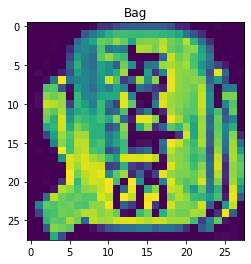

In [52]:
plt.imshow(X_train[12])
plt.title(class_names[y_train[12]])